In [450]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# Data

In [451]:
#format data - from imputation project 
gas_data = pd.read_csv("gas_price_data.txt", delimiter='\t', header= 2) #read file
#seperate values by commas (read as csv), seperate lines by tab (delimiter = '\t') and ignore the first 2 lines (header = 2)

#give header name for easy access
gas_data = gas_data.rename(columns={'Unnamed: 0':'Date'}) 
gas_data["Date"] = pd.to_datetime(gas_data["Date"], format = "%b %d, '%y") #convert dates to YYYY-MM-DD format - looks better

#make a list of indexes - the x values 
nums = gas_data.index

#save price data to arrays - the y values
known_diesel_price = np.array(gas_data["Diesel"])  
known_regular_price = np.array(gas_data["Regular"])

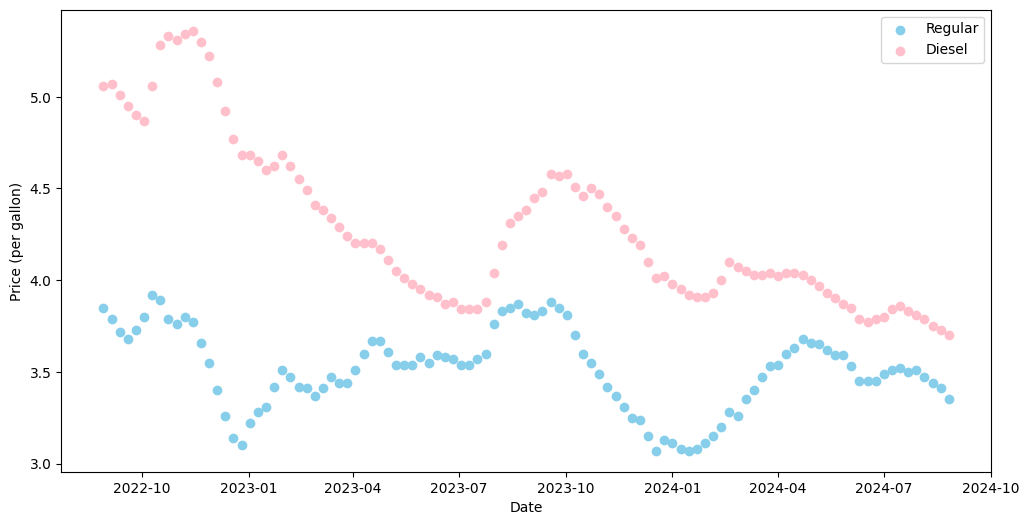

In [452]:
#plot points 
plt.figure(figsize=(12,6))
plt.scatter(gas_data["Date"], known_regular_price, color = "skyblue", label = "Regular")
plt.scatter(gas_data["Date"], known_diesel_price, color = "pink", label = "Diesel") 
plt.xlabel("Date")
plt.ylabel("Price (per gallon)")
plt.legend()
plt.show()

# $6^{th}$ Degree Polynomial

$f(x) = ax^6 + bx^5 + cx^4 + dx^3 + ex^2 + fx + g$ <br><br>
$f'_a(x) = x^6 $ <br>
$f'_b(x) = x^5 $ <br>
$f'_c(x) = x^4 $ <br>
$f'_d(x) = x^3 $ <br>
$f'_e(x) = x^2 $ <br>
$f'_f(x) = x $ <br>
$f'_g(x) = 0 $ <br>


In [453]:
def poly_function(a: float, b:float, c:float, d:float, e:float, f:float, g:float, x: np.array) -> np.array: 
    return (a * x**6) + (b * x**5) + (c * x**4) + (d * x**3) + (e * x**2) + (f * x) + e

# Sin Function 

$ f(x) = (a +bx)sin(cx+d) $ 
<br><br>
Partial Derivatives: <br>
$ f_{a}'(x) = sin(cx+d) $ <br>
$ f_{b}'(x) = xsin(cx+d)$ <br>
$ f_{c}'(x) = x(a+bx)cos(cx+d)$ <br>
$ f_{d}'(x) = (a+bx)cos(cx + d)$ <br>

In [454]:
def sin_function(a: float, b: float, c:float, d:float, x: np.array) -> np.array: 
    """return the value of the gas trend function"""
    return (a + b * x) * np.sin(c * x + b)

# Mean Absolute Error
$ E = \frac{1}{n}\sum{|(y_{i} - \hat{y_{i}})|} $

In [455]:
def poly_mean_absolute_error(a: float, b: float, c: float, d: float, e:float, f:float, g:float, x:np.array, y:np.array, f_x: callable): 
    '''Use mean absolute error to determine close match for coeffecients a, b, c, and d'''
    # Hyperparameters
    learning_rate = 0.00001
    epochs = 1000

    # Number of samples
    n = len(x)
    
    #show starting parameters
    print(f"Starting parameters: a = {a:.4f}, b = {b:.4f}, c = {c:.4f}, d = {d:.4f}, e = {e:.4f}, f = {f:.4f}, g = {g:.4f}")

    # Gradient descent loop
    for epoch in range(epochs):
        # Predictions (applying the model to the input data) - use trend functiom 
        y_pred = f_x(a, b, c, d, e, f, g, x)
        
        # The derivatives of each parameter - derivative of error function
        
        da = (1/n) * np.sum(np.sign(y - y_pred) * x**6) #with repect to a - x**6 from chain rule
        db = (1/n) * np.sum(np.sign(y - y_pred) * x**5) #with repect to b - x**5 from chain rule 
        dc = (1/n) * np.sum(np.sign(y - y_pred) * x**4) #with respect to c - x**5 from chain rule
        dd = (1/n) * np.sum(np.sign(y - y_pred) * x**3)
        de = (1/n) * np.sum(np.sign(y - y_pred) * x**2)
        df = (1/n) * np.sum(np.sign(y - y_pred) * x)
        dg = (1/n) * np.sum(np.sign(y - y_pred))
        
        # Adjust the parameters with the derviatives adjusted according to the learning rate 
        a = a - learning_rate * da 
        b = b - learning_rate * db 
        c = c - learning_rate * dc 
        d = d - learning_rate * dd 
        e = d - learning_rate * de
        f = f - learning_rate * df
        g = g - learning_rate * dg
        
        # Print progress every 100 epochs -- so we see if we're actually making progress
        if epoch % 100 == 0:
            loss = np.mean((y - y_pred) ** 2)
            print(f"Epoch {epoch}: Loss = {loss:.4f}, a = {a:.4f}, b = {b:.4f}, c = {c:.4f}, d = {d:.4f}, e = {e:.4f}, f = {f:.4f}, g = {g:.4f}")

    # Final parameters
    print(f"Final parameters: a = {a:.4f}, b = {b:.4f}, c = {c:.4f}, d = {d:.4f}, e = {e:.4f}, f = {f:.4f}, g = {g:.4f}")
    return a, b, c, d, e, f, g

# Gradient Descent - $6^{th}$ Degree Polynomial #

In [456]:
# choose starting values of coefficients 
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()
e = np.random.randn()
f = np.random.randn()
g = np.random.randn()

In [457]:
a_reg, b_reg, c_reg, d_reg, e_reg, f_reg, g_reg = poly_mean_absolute_error(a, b, c, d, e, f, g, nums, known_regular_price, poly_function)

Starting parameters: a = 0.6615, b = 0.7719, c = 2.4283, d = -0.5444, e = 0.2361, f = -0.2020, g = -0.8268
Epoch 0: Loss = 58202515816287811141632.0000, a = 1851216.6619, b = 20669.2015, c = 239.7782, d = 2.2948, e = 2.3310, f = -0.2015, g = -0.8268
Epoch 100: Loss = 4447698743127649618508743652612398645248.0000, a = 186972816.6994, b = 2087512.1615, c = 23974.7657, d = 286.2148, e = 286.2510, f = -0.1495, g = -0.8258
Epoch 200: Loss = 17790794908153098803323976857314096316416.0000, a = 372094416.7369, b = 4154355.1215, c = 47709.7531, d = 570.1348, e = 570.1710, f = -0.0975, g = -0.8248
Epoch 300: Loss = 40029288495076230893104106802389733867520.0000, a = 557216016.7744, b = 6221198.0815, c = 71444.7406, d = 854.0548, e = 854.0910, f = -0.0455, g = -0.8238
Epoch 400: Loss = 71163179503898101884552566866423417143296.0000, a = 742337616.8120, b = 8288041.0415, c = 95179.7281, d = 1137.9748, e = 1138.0110, f = 0.0065, g = -0.8228
Epoch 500: Loss = 1111924679346182354608964288855203119104

In [458]:
a_die, b_die, c_die, d_die, e_die, f_die, g_die = poly_mean_absolute_error(a, b, c, d, e, f, g, nums, known_diesel_price, poly_function)

Starting parameters: a = 0.6615, b = 0.7719, c = 2.4283, d = -0.5444, e = 0.2361, f = -0.2020, g = -0.8268
Epoch 0: Loss = 58202515816185218465792.0000, a = 1851216.6619, b = 20669.2015, c = 239.7782, d = 2.2948, e = 2.3310, f = -0.2015, g = -0.8268
Epoch 100: Loss = 4447698743127649618508743652612398645248.0000, a = 186972816.6994, b = 2087512.1615, c = 23974.7657, d = 286.2148, e = 286.2510, f = -0.1495, g = -0.8258
Epoch 200: Loss = 17790794908153098803323976857314096316416.0000, a = 372094416.7369, b = 4154355.1215, c = 47709.7531, d = 570.1348, e = 570.1710, f = -0.0975, g = -0.8248
Epoch 300: Loss = 40029288495076230893104106802389733867520.0000, a = 557216016.7744, b = 6221198.0815, c = 71444.7406, d = 854.0548, e = 854.0910, f = -0.0455, g = -0.8238
Epoch 400: Loss = 71163179503898101884552566866423417143296.0000, a = 742337616.8120, b = 8288041.0415, c = 95179.7281, d = 1137.9748, e = 1138.0110, f = 0.0065, g = -0.8228
Epoch 500: Loss = 1111924679346182354608964288855203119104

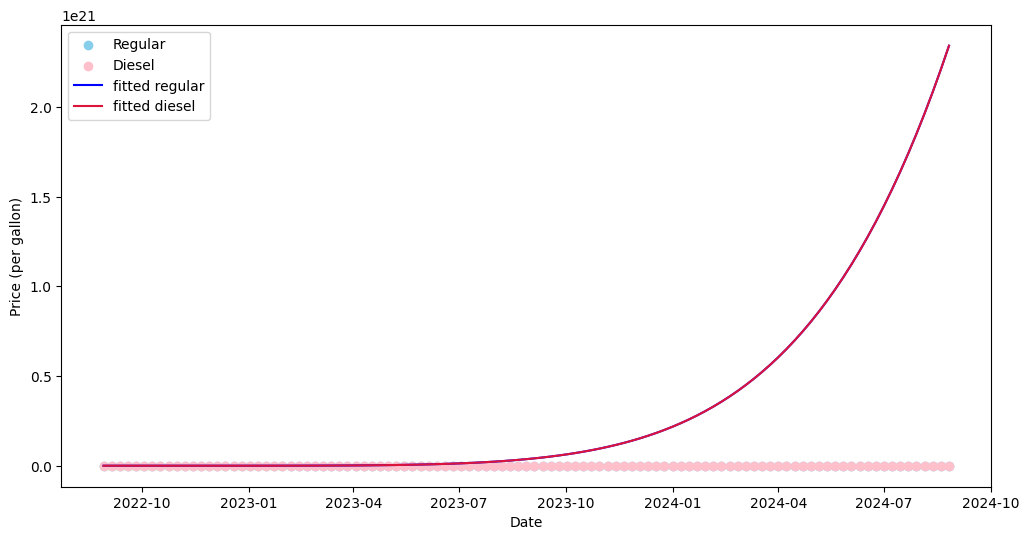

In [459]:

#graph 
plt.figure(figsize=(12,6))
plt.scatter(gas_data["Date"], known_regular_price, color = "skyblue", label="Regular") #plot known points 
plt.scatter(gas_data["Date"], known_diesel_price, color = "pink", label= "Diesel") 
plt.plot(gas_data["Date"], poly_function(a_reg, b_reg, c_reg, d_reg, e_reg, f_reg, g_reg, nums), color ="blue", label ="fitted regular")
plt.plot(gas_data["Date"], poly_function(a_die, b_die, c_die, d_die, e_die, f_die, g_die, nums), color = "crimson", label = "fitted diesel")
plt.xlabel("Date")
plt.ylabel("Price (per gallon)")
plt.legend()
plt.show()

# Mean Squared Error

$ E = \frac{1}{n}\sum{(y_{i} - \hat{y_{i}})^2} $

In [460]:

def sin_mean_squared_error(a: float, b: float, c: float, d: float, x:np.array, y:np.array, f: callable): 
    '''Use mean absolute error to determine close match for coeffecients a, b, c, and d'''
    # Hyperparameters
    learning_rate = 0.1
    epochs = 1000

    # Number of samples
    n = len(x)
    
    #normalize x values to prevent overflow 
    x = x/np.max(x)
    
    #show starting parameters
    print(f"Starting parameters: a = {a:.4f}, b = {b:.4f}, c = {c:.4f}, d = {d:.4f}")

    # Gradient descent loop
    for epoch in range(epochs):
        # Predictions (applying the model to the input data) - use trend functiom 
        y_pred = f(a, b, c, d, x)
        
        # The derivatives of each parameter - derivative of error function
        
        da = (1/n) * np.sum(2 * (y - y_pred) * np.sin((c * x) + d)) #with respect to a 
        db = (1/n) * np.sum(2 * (y-y_pred) * np.sin((c *x) + d) * x) # with respect to b 
        dc = (1/n) * np.sum(2 * (y-y_pred) * x * (a + b * x) * np.cos(c * x + d)) # with respect to c 
        dd = (1/n) * np.sum(2 * (y-y_pred) * (a + b * x) * np.cos(c * x + d)) # with respect to d
        
        
        # Adjust the parameters with the derviatives adjusted according to the learning rate 
        a = a - learning_rate * da 
        b = b - learning_rate * db 
        c = c - learning_rate * dc 
        d = d - learning_rate * dd 
        
        
        # Print progress every 100 epochs -- so we see if we're actually making progress
        if epoch % 100 == 0:
            loss = np.mean((y - y_pred) ** 2)
            print(f"Epoch {epoch}: Loss = {loss:.4f}, a = {a:.4f}, b = {b:.4f}, c = {c:.4f}, d = {d:.4f}")

    # Final parameters
    print(f"Final parameters: a = {a:.4f}, b = {b:.4f}, c = {c:.4f}, d = {d:.4f}")
    return a, b, c, d 

# Gradient Descent - Sin Function

In [461]:
# choose starting values of a, b, c, and d 
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

In [462]:
a_reg, b_reg, c_reg, d_reg = sin_mean_squared_error(a, b, c, d, nums, known_regular_price, sin_function)

Starting parameters: a = 0.5937, b = 0.2980, c = -0.3249, d = 1.7261
Epoch 0: Loss = 11.7508, a = -0.0875, b = -0.0423, c = -0.3437, d = 1.7169
Epoch 100: Loss = 0.6974, a = -3.9886, b = -0.4034, c = -2.2887, d = 1.0931
Epoch 200: Loss = 58.2504, a = -8.5922, b = -2.4690, c = -27.2723, d = -40.4460
Epoch 300: Loss = 43.6847, a = -6.2557, b = -1.2272, c = 44.2552, d = 86.9864
Epoch 400: Loss = 27.8716, a = -5.2054, b = -0.6779, c = 48.3327, d = 92.0584
Epoch 500: Loss = 27.9328, a = -5.2273, b = -0.7714, c = 49.7698, d = 92.0400
Epoch 600: Loss = 28.0204, a = -5.0329, b = -1.2300, c = 50.5794, d = 91.5275
Epoch 700: Loss = 27.9022, a = -4.7822, b = -1.7181, c = 51.0579, d = 91.0397
Epoch 800: Loss = 27.8236, a = -4.5315, b = -2.2091, c = 51.5221, d = 90.5531
Epoch 900: Loss = 27.8238, a = -4.2809, b = -2.7032, c = 51.9904, d = 90.0570
Final parameters: a = -4.0774, b = -3.2174, c = 54.3597, d = 92.7278


In [463]:
a_dis, b_dis, c_dis, d_dis = sin_mean_squared_error(a, b, c, d, nums, known_diesel_price, sin_function)

Starting parameters: a = 0.5937, b = 0.2980, c = -0.3249, d = 1.7261
Epoch 0: Loss = 17.7826, a = -0.2419, b = -0.1023, c = -0.3458, d = 1.7189
Epoch 100: Loss = 13.4870, a = -5.7761, b = 0.4699, c = -5.5104, d = 0.4669
Epoch 200: Loss = 34.8522, a = -5.2483, b = -1.4292, c = -15.7276, d = -8.9334
Epoch 300: Loss = 35.3952, a = -4.5776, b = -2.2172, c = -14.8296, d = -3.6529
Epoch 400: Loss = 35.3818, a = -3.4597, b = -4.6945, c = -9.9294, d = -3.2708
Epoch 500: Loss = 34.6606, a = -3.0786, b = -4.9858, c = -22.4380, d = -22.2259
Epoch 600: Loss = 34.2511, a = -2.5839, b = -5.9769, c = -21.3992, d = -23.2108
Epoch 700: Loss = 34.5265, a = -2.0203, b = -6.9167, c = -20.2765, d = -24.2948
Epoch 800: Loss = 35.2248, a = -1.3457, b = -8.0495, c = -18.9704, d = -25.5471
Epoch 900: Loss = 36.4330, a = -0.4362, b = -9.2803, c = -17.7068, d = -27.0176
Final parameters: a = 0.0280, b = -10.4355, c = -19.0950, d = -31.1391


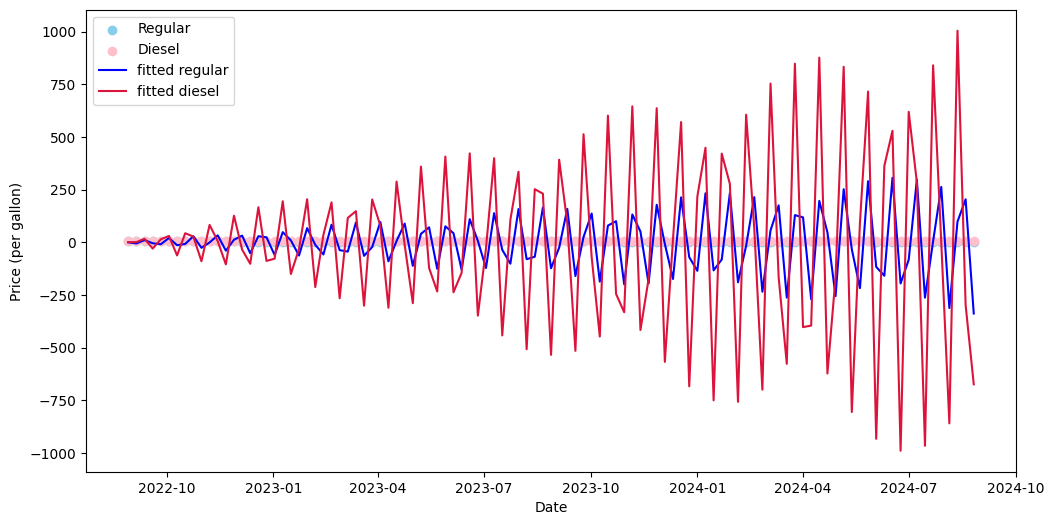

In [464]:
#graph 
plt.figure(figsize=(12,6))
plt.scatter(gas_data["Date"], known_regular_price, color = "skyblue", label="Regular") #plot known points 
plt.scatter(gas_data["Date"], known_diesel_price, color = "pink", label= "Diesel") 
plt.plot(gas_data["Date"], sin_function(a_reg, b_reg, c_reg, d_reg, nums), color ="blue", label ="fitted regular")
plt.plot(gas_data["Date"], sin_function(a_dis, b_dis, c_reg, d_reg, nums), color = "crimson", label = "fitted diesel")
plt.xlabel("Date")
plt.ylabel("Price (per gallon)")
plt.legend()
plt.show()